In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np 

from IPython import display as dsp

import ipywidgets as widgets


# Part 2: Classical Particle in a Box

### Dynamical Frequencies ###

As we discussed in our first week's lecture, the frequency of light absorbed by a molecule is closely related to the frequency with which its atoms and electrons move. Although a complete classical (or quantum!) description of the absorption of light by a molecule is quite complicated, all the information we need is embedded in the question: With what *frequency* does the particle move? 

For a classical particle bouncing back and forth in a box, the frequency of its motion is just determined by how long it takes to travel from one end of the box to the other. If the particle moves with a velocity $v_x$ through a box of length $L$ (in the x-dimension), then it takes time 
$$ \tau_{1/2} = \frac{L}{v_x}$$
to travel from one end of the box to the other. To travel *back* to the other side takes another period of $\tau_{1/2}$, so the total time for a round-trip is 
$$\tau = \frac{2L}{v_x}.$$

The *frequency* with which the particle completes this trip is just the inverse of this round-trip time: 
$$ \nu = \frac{1}{\tau} = \frac{v_x}{2L}. $$
So we see that the frequency of the particle is determined by 
1. the length of the box and
2. the velocity of the particle. 

What determines the velocity $v_x$ of a classical particle? Many things! But you'll learn later in your lecture course that free particles have velocities distributed according to a *probability density* that looks like 
$$ p(v_x) = e^{-\frac{mv_x^2}{2 k_B T}},$$
where $T$ is the temperature of the system, $m$ is the particle mass, and $k_B$ is a universal constant known as the *Boltzmann constant*. 

For the purposes of this lab, you don't need to memorize this equation or understand where it comes. What you **do** need to remember is that according to classical mechanics
1. A particle in a box moves with a dynamic frequency of $\tau = \frac{v_x}{2L}$, and 
2. Velocity will vary randomly from particle-to-particle (and therefore molecule to moleucule). 

### A Simple Simulation ###

What we want to do now is to use these observations to determine the frequency of light that would be most likely absorbed by a classical particle-in-a-box. Although we could do this calculation analytically, it will probably be more memorable to watch a simulation that gives us the same result. To this end, the buttons below will let you run a simple dynamical simulation showing a collection of classical particles "bouncing" back and forth across a closed box. By moving the slide bars, you can change both the number of particles and the length of the box. 

In this simple simulation, the particles don't interact with each other -- if two particles collide, they just pass right on through each other without noticing! This allows us to collect statistics on *many* classical particles without worrying about them interfering with each other. (Remember that experimentally you also average over the absorption properties of many individual electrons, since your dye solution contains many molecules!) 

After the simulation finishes, a histogram will pop up showing the number of particles in the simulation that bounce across the x-dimension of the box with frequencies from 0 to 200 THz. (THZ = "terahertz" or $1\cdot 10^{12}$ Hz).

### Instructions ###

1. For this lab, first run a simulation with the default parameters (10 particles, 10 Angstrom box length). Then compare this simulation with runs with L set to 2 Angstrom and 20 Angstrom. How does changing the box length alter the time it takes each particle to travel across the box? 

2. Second, run simulations with 5000 particles and box lengths of 5, 10, and 15 Angstroms. (You probably won't be able to distinguish the different particles since the box is so full!) Looking at the histogram, what is the most common round-trip frequency in each case? 

In [11]:
def run_dynamics(b):
    
    L = Lslider.value*1e-10
    
    Ly = 2.0e-10
    
    Npart = Nslider.value
    
    tmax=50e-15       # Total simulation time in seconds
    dt=0.5e-15     # Time-step in seconds
    M=0.0005485799 # Mass in AMU (1 AMU = 1.66054e-27 kg)
    V=np.sqrt(300.0*1.380649e-23/(9.1093837015e-31))          # Velocity (magnitude) in m/s

    x=np.random.rand(Npart)*L                                   # initial x-coordinate (meters)
    y=np.random.rand(Npart)*Ly                      # initial y-coordinate (meters)
    vx = np.random.normal(0, V/np.sqrt(2), (Npart,))  # initial x-component of velocity (arbitrary units)
    vy = np.random.normal(0, V/np.sqrt(2), (Npart,))  # initial x-component of velocity (arbitrary units)

    fig = plt.figure(figsize=(L*0.5e+10, Ly*0.5e+10))

    graph_handle, = plt.plot(x*1e+10, y*1e+10, 'ko')

    text_handle = plt.text(0.1*L*1e+10,1.2*Ly*1e+10,'t = '+'{:.1f}'.format(0)+' fs', fontsize=16)
    plt.xlim([0,L*1e+10])
    plt.ylim([0,Ly*1e+10])
    plt.xlabel('X (Angstrom)', fontsize=16)
    plt.ylabel('Y (Angstrom)', fontsize=16)
    plt.xticks(np.arange(0, L*1.05*1e+10, 2), fontsize=16)
    plt.yticks(np.arange(0, Ly*1.05*1e+10, 2), fontsize=16)
    plt.gca().set_aspect('equal')

    Nsteps=int(round(tmax/dt))     
    for n in range(0,Nsteps):      
        x = x + dt*vx              
        y = y + dt*vy

        ndcsx = np.where((x>L) + (x<0))
        vx[ndcsx] = -vx[ndcsx]

        ndcsy = np.where((y>Ly) + (y<0))
        vy[ndcsy] = -vy[ndcsy]

        graph_handle.set_xdata(x*1e+10)
        graph_handle.set_ydata(y*1e+10)
        text_handle.set_text('t = '+'{:.1f}'.format(n*dt*1e+15)+' fs')
        dsp.display(plt.gcf())
        dsp.clear_output(wait=True)

    plt.figure(figsize=(4,4))
    plt.title('Frequency Histogram')
    fx = np.abs(1e-12*vx/(2*L))
    bins = np.arange(0, 200, 5)
    dat = plt.hist(fx, bins)

    plt.xlabel('Frequency (THz)', fontsize=16)
    plt.xticks([0, 100, 200], fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Number of particles', fontsize=16)

    plt.show()
    
    display(Nbox)
    display(Lbox)
    display(go_bt)

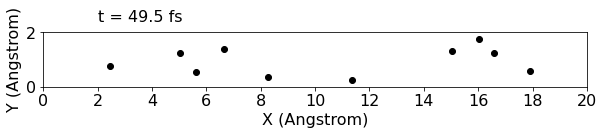

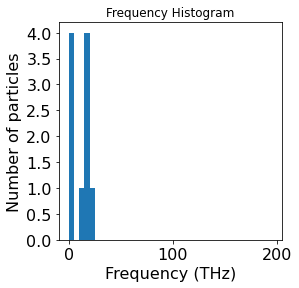

Button(description='Run Simulation!', style=ButtonStyle())

In [12]:
import ipywidgets as widgets

Nlabel = widgets.HTML(
    value='Number of Particles: '
)

Nslider = widgets.IntSlider(
    value=10,
    min=10,
    max=5000,
    step=10,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

Llabel = widgets.HTML(
    value='Box Length (Ang.): '
)

Lslider = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

go_bt = widgets.Button(
    description='Run Simulation!'
)
go_bt.on_click(run_dynamics)

Nbox = widgets.HBox([Nlabel, Nslider])
Lbox = widgets.HBox([Llabel, Lslider])

display(Nbox)
display(Lbox)
display(go_bt)